In [39]:
import pandas as pd  

file = pd.read_csv("./dataSet/ONLINE EDUCATION SYSTEM REVIEW.csv") 
file.head(5)

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average


In [38]:
from sklearn.preprocessing import OneHotEncoder
import os
base =os.curdir
file_not_encoded = pd.read_csv("./dataSet/ONLINE EDUCATION SYSTEM REVIEW.csv") 
encoder = OneHotEncoder(sparse = False)
def one_hot_encode(column, df):
    seleted_col = df[[column]]
    encoder.fit(seleted_col)
    encoded = encoder.transform(seleted_col)
    encoded = pd.DataFrame(data=encoded,columns=encoder.categories_)
    return encoded

encode_cols = {"Gender", "Home Location", "Level of Education", "Device type used to attend classes","Economic status","Are you involved in any sports?","Interested in Gaming?","Have separate room for studying?",
"Engaged in group studies?","Interested in?","Do elderly people monitor you?","Your level of satisfaction in Online Education"}

for x in encode_cols:
    encoded_col = one_hot_encode(x,file)
    file.drop(x,axis=1,inplace =True)
    file_not_encoded.drop(x,axis=1,inplace =True)
    for y in encoded_col.columns:
        path = str(x)+str(y)
        path = str(path)
        path = path.replace("'","")
        path = path.replace(",","")
        file.insert(len(file.columns),path,encoded_col[y])
    # x.replace(" ","_")
    path = "./dataSet/encoded/"+x+".csv"
    encoded_col.to_csv(path,index=False)

file_not_encoded.to_csv("./dataSet/not-encoded-number-features.csv")
file.to_csv("./dataSet/one_hot_encoded.csv")

OSError: [Errno 22] Invalid argument: './dataSet/encoded/Do elderly people monitor you?.csv'

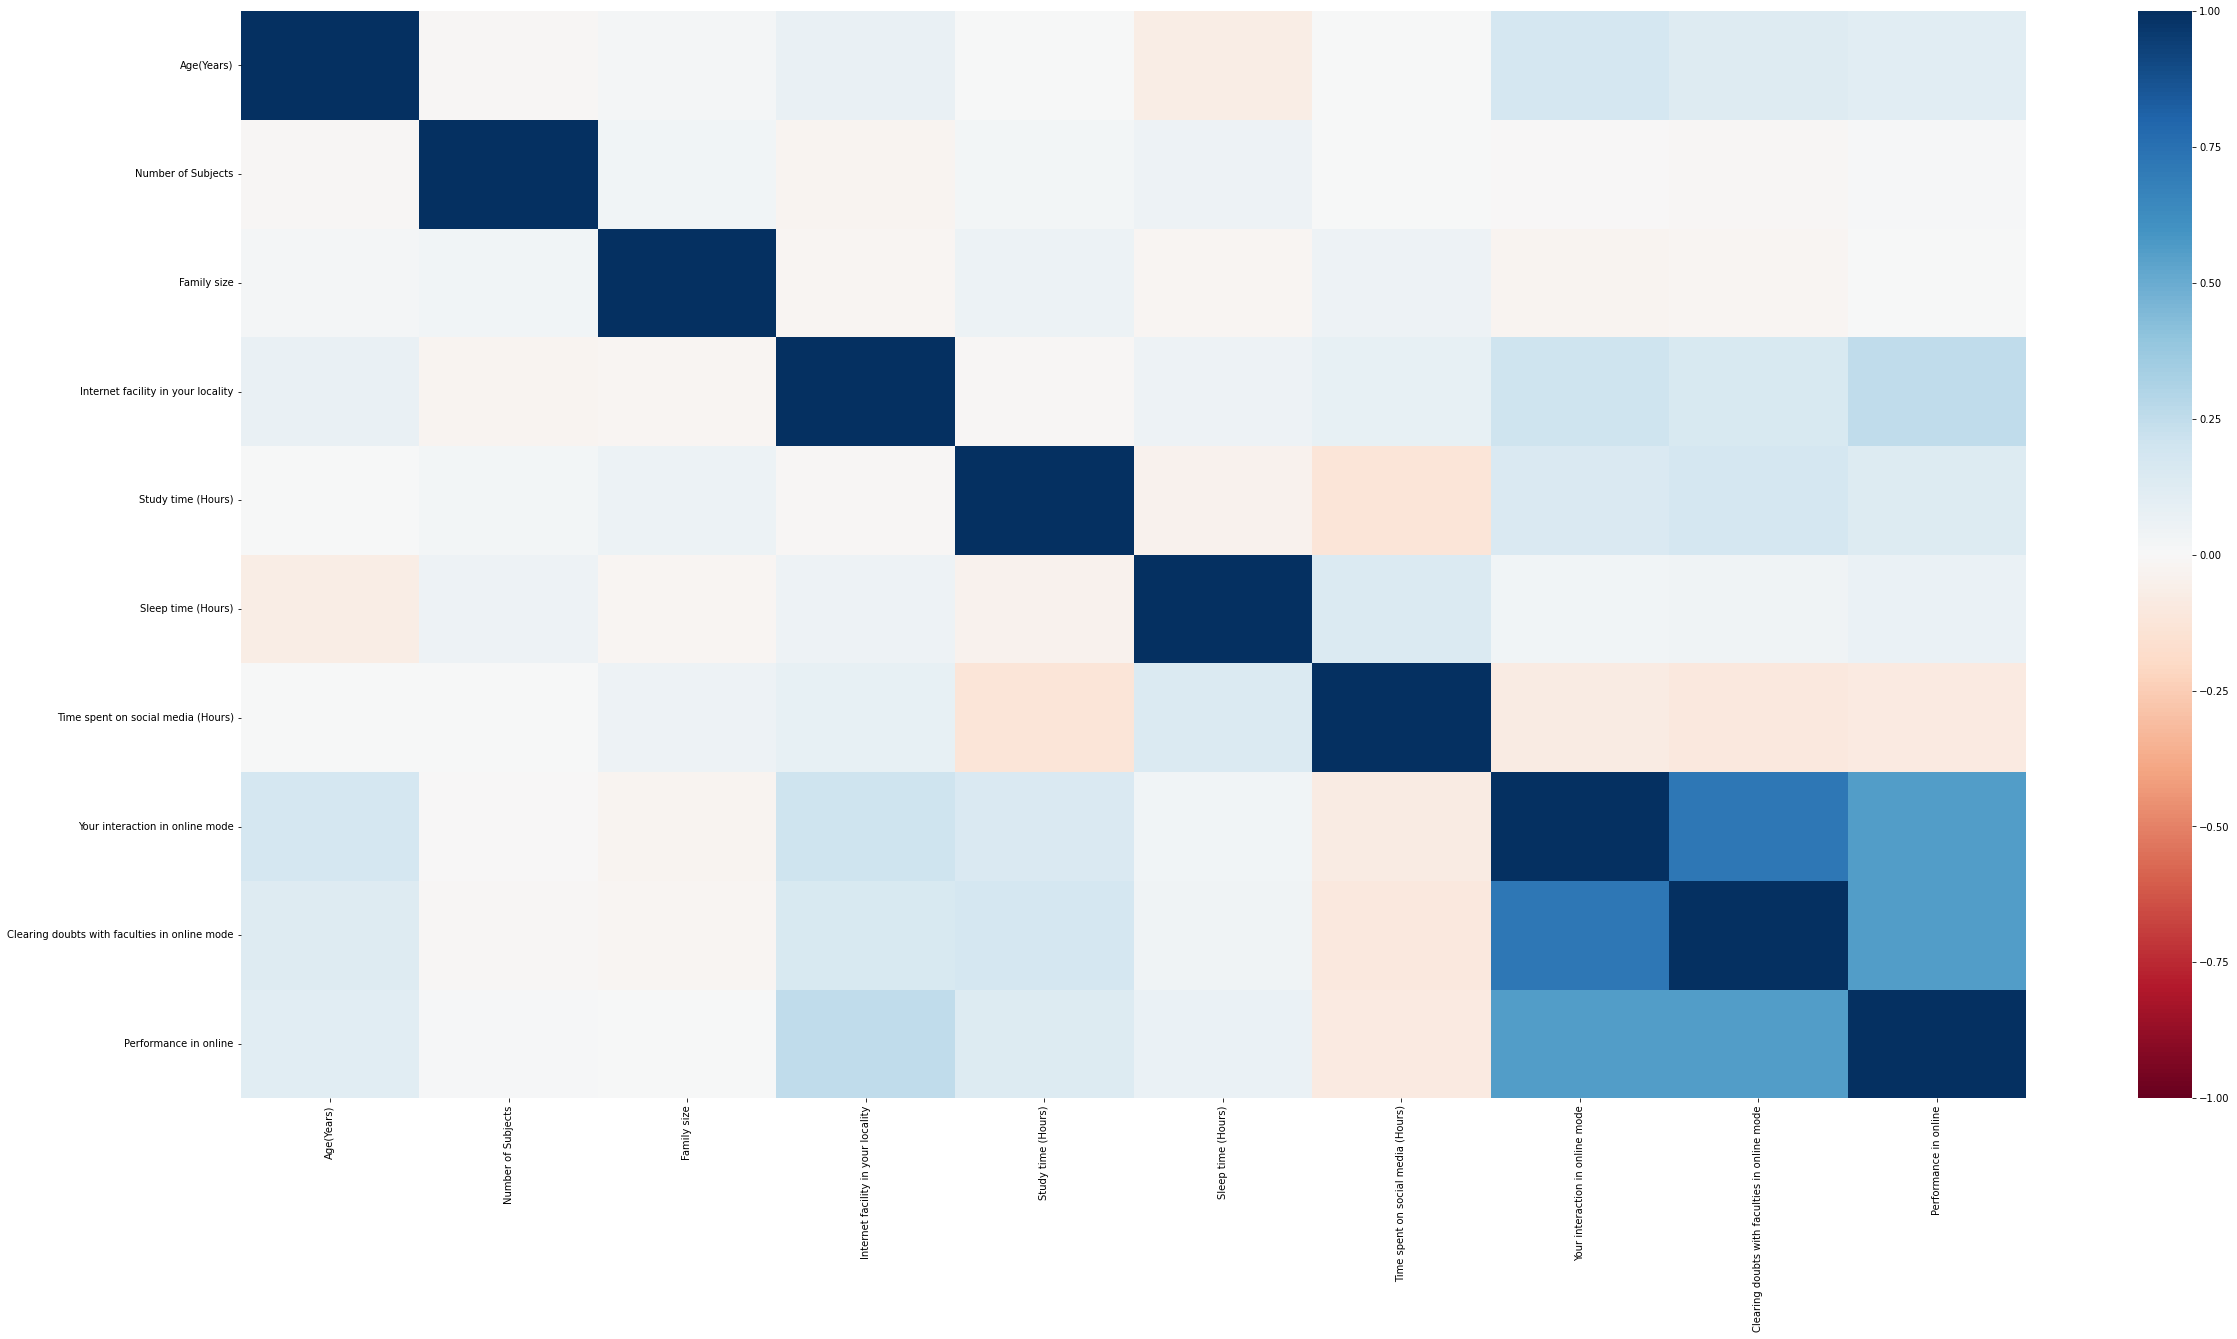

In [40]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# df = pd.read_csv (r'auto-mpg.csv')
# df.drop('origin', axis=1, inplace=True)
plt.figure(figsize=(40,20))
corr = file.corr()
_=sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=False,cmap='RdBu')

In [ ]:
var_names = list(file.columns)
print (var_names)
var_names.remove('Your level of satisfaction in Online Education(Bad)')
var_names.remove('Your level of satisfaction in Online Education(Good)')
var_names.remove('Your level of satisfaction in Online Education(Average)')
pairplot_df = file.copy()
pairplot_df.drop('Your level of satisfaction in Online Education(Average)',axis=1,inplace =True)
pairplot_df.drop('Your level of satisfaction in Online Education(Bad)',axis=1,inplace =True)
pairplot_df.drop('Your level of satisfaction in Online Education(Good)',axis=1,inplace =True)
pairplot_df.
pairplot_df.head(10)
# _=sns.pairplot(data=file,vars=var_names,
#               kind='scatter',plot_kws=dict(size=.5,alpha=.5),hue=satisfication_val)

['Age(Years)', 'Number of Subjects', 'Family size', 'Internet facility in your locality', 'Study time (Hours)', 'Sleep time (Hours)', 'Time spent on social media (Hours)', 'Average marks scored before pandemic in traditional classroom', 'Your interaction in online mode', 'Clearing doubts with faculties in online mode', 'Performance in online', 'Have separate room for studying?(No)', 'Have separate room for studying?(Yes)', 'Interested in?(Both)', 'Interested in?(Practical)', 'Interested in?(Theory)', 'Interested in Gaming?(No)', 'Interested in Gaming?(Yes)', 'Do elderly people monitor you?(No)', 'Do elderly people monitor you?(Yes)', 'Your level of satisfaction in Online Education(Average)', 'Your level of satisfaction in Online Education(Bad)', 'Your level of satisfaction in Online Education(Good)', 'Gender(Female)', 'Gender(Male)', 'Economic status(Middle Class)', 'Economic status(Poor)', 'Economic status(Rich)', 'Engaged in group studies?(No)', 'Engaged in group studies?(yes)', 'Hom

,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,...,Home Location(Rural),Home Location(Urban),Level of Education(Post Graduate),Level of Education(School),Level of Education(Under Graduate),Device type used to attend classes(Desktop),Device type used to attend classes(Laptop),Device type used to attend classes(Mobile),Are you involved in any sports?(No),Are you involved in any sports?(Yes)
0,18,11,4,5,3,6,1,91-100,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,19,7,4,1,7,5,1,91-100,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,18,5,5,2,6,7,1,71-80,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,18,5,4,4,3,6,2,91-100,1,2,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,18,5,4,3,8,7,2,81-90,3,3,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,18,5,4,4,3,6,2,91-100,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,19,5,5,5,2,6,3,81-90,4,3,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7,17,4,4,4,4,8,6,61-70,3,3,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,19,5,4,4,6,6,2,81-90,4,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,20,9,4,3,4,7,2,81-90,3,2,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Average out the Average-mark-scores column
I will attempting to use the average of the boundary in the `Average marks scored before pandemic in traditional classroom` column and replace it into our data.

## ! NO LONGER RELEVANT DO NOT DO THIS

In [ ]:
# average_score = data['Average marks scored before pandemic in traditional classroom']
# print(type(average_score))
# 
# 
# def average_func(range:str) -> float:
#     boundaries = range.split('-')
#     boundaries = [int(i) for i in boundaries]
#     return sum(boundaries) / len(boundaries)
# 
# data['Average marks scored before pandemic in traditional classroom'] = average_score.apply(average_func)
# data.head(5)
# 
# data.to_csv('./dataSet/Averaged scores data.csv')

<class 'pandas.core.series.Series'>


> Prep the data

In [49]:
data = pd.read_csv('./dataSet/ONLINE EDUCATION SYSTEM REVIEW.csv')
data.head(5)

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average


# Ordinal Encoding the Dataset
I will encode any categorial values in our dataset into Ordinal Encoding. That is turning categorial values into '1, 2, 3' and such.

In [54]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('./dataSet/ONLINE EDUCATION SYSTEM REVIEW.csv')
data.head(5)

# Encoder doesn't touch numerical value, so it works fine for us
encoder = OrdinalEncoder()
y_encorder = LabelEncoder()

for col_name in data.columns:
    if data[col_name].dtype == 'object':
        print(f'Encoding of {col_name}:\n')
        transformed = encoder.fit_transform(data[col_name].to_numpy().reshape(-1, 1))
        transformed_df = pd.DataFrame(transformed)
        data[col_name] = transformed_df.values
        print(f'{encoder.categories_}')

coded_target = y_encorder.fit_transform(data['Your level of satisfaction in Online Education'])

print(f'List of Target encoding:\n{y_encorder.classes_}')
data.head(25)

Encoding of Gender:

[array(['Female', 'Male'], dtype=object)]
Encoding of Home Location:

[array(['Rural', 'Urban'], dtype=object)]
Encoding of Level of Education:

[array(['Post Graduate', 'School', 'Under Graduate'], dtype=object)]
Encoding of Device type used to attend classes:

[array(['Desktop', 'Laptop', 'Mobile'], dtype=object)]
Encoding of Economic status:

[array(['Middle Class', 'Poor', 'Rich'], dtype=object)]
Encoding of Are you involved in any sports?:

[array(['No', 'Yes'], dtype=object)]
Encoding of Do elderly people monitor you?:

[array(['No', 'Yes'], dtype=object)]
Encoding of Interested in Gaming?:

[array(['No', 'Yes'], dtype=object)]
Encoding of Have separate room for studying?:

[array(['No', 'Yes'], dtype=object)]
Encoding of Engaged in group studies?:

[array(['No', 'yes'], dtype=object)]
Encoding of Average marks scored before pandemic in traditional classroom:

[array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70',
       '71-80', '81-90', '91-1

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,1.0,1.0,2.0,18,11,1.0,0.0,4,5,0.0,...,1,0.0,0.0,0.0,9.0,1,1,1.0,6,0.0
1,1.0,1.0,2.0,19,7,1.0,0.0,4,1,1.0,...,1,1.0,1.0,0.0,9.0,1,1,2.0,3,1.0
2,1.0,0.0,2.0,18,5,1.0,0.0,5,2,0.0,...,1,0.0,1.0,0.0,7.0,1,1,0.0,6,1.0
3,1.0,1.0,2.0,18,5,1.0,0.0,4,4,1.0,...,2,0.0,0.0,1.0,9.0,1,2,2.0,4,1.0
4,1.0,0.0,2.0,18,5,1.0,0.0,4,3,0.0,...,2,1.0,1.0,1.0,8.0,3,3,0.0,6,0.0
5,1.0,1.0,2.0,18,5,1.0,0.0,4,4,1.0,...,2,0.0,0.0,1.0,9.0,1,1,2.0,2,1.0
6,1.0,1.0,2.0,19,5,1.0,0.0,5,5,0.0,...,3,1.0,1.0,1.0,8.0,4,3,0.0,6,0.0
7,1.0,1.0,2.0,17,4,1.0,0.0,4,4,1.0,...,6,0.0,1.0,0.0,6.0,3,3,1.0,6,0.0
8,0.0,1.0,2.0,19,5,1.0,0.0,4,4,0.0,...,2,0.0,1.0,1.0,8.0,4,1,0.0,9,1.0
9,0.0,0.0,2.0,20,9,1.0,0.0,4,3,0.0,...,2,0.0,0.0,0.0,8.0,3,2,2.0,6,0.0


# Standar Scaler for The Dataset
I will use standard scaler to scale all the numerical data in our dataset to increase the training performance

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the whole data
for col_name in data.columns:
    if (data.dtypes[col_name] != 'object'):
        data[col_name] = scaler.fit_transform(data[col_name].to_numpy().reshape(-1, 1))
    
data.head(25)

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,0.826081,0.722049,0.486024,-0.562497,1.411598,-0.581565,-0.270233,-0.334392,1.378125,-0.747040,...,-0.880700,-1.088087,-1.196072,-0.822769,1.244915,-1.747111,-1.576433,0.128714,-0.362683,-0.867222
1,0.826081,0.722049,0.486024,-0.249763,-0.012407,-0.581565,-0.270233,-0.334392,-2.522158,1.338616,...,-0.880700,0.919045,0.836070,-0.822769,1.244915,-1.747111,-1.576433,1.458326,-1.925901,0.338485
2,0.826081,-1.384947,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,0.474571,-1.547087,-0.747040,...,-0.880700,-1.088087,0.836070,-0.822769,-0.165943,-1.747111,-1.576433,-1.200899,-0.362683,0.338485
3,0.826081,0.722049,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,-0.334392,0.403054,1.338616,...,-0.342697,-1.088087,-1.196072,1.215409,1.244915,-1.747111,-0.716636,1.458326,-1.404828,0.338485
4,0.826081,-1.384947,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,-0.334392,-0.572016,-0.747040,...,-0.342697,0.919045,0.836070,1.215409,0.539486,0.063085,0.143161,-1.200899,-0.362683,-0.867222
5,0.826081,0.722049,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,-0.334392,0.403054,1.338616,...,-0.342697,-1.088087,-1.196072,1.215409,1.244915,-1.747111,-1.576433,1.458326,-2.446973,0.338485
6,0.826081,0.722049,0.486024,-0.249763,-0.724409,-0.581565,-0.270233,0.474571,1.378125,-0.747040,...,0.195306,0.919045,0.836070,1.215409,0.539486,0.968184,0.143161,-1.200899,-0.362683,-0.867222
7,0.826081,0.722049,0.486024,-0.875230,-1.080410,-0.581565,-0.270233,-0.334392,0.403054,1.338616,...,1.809316,-1.088087,0.836070,-0.822769,-0.871373,0.063085,0.143161,0.128714,-0.362683,-0.867222
8,-1.210535,0.722049,0.486024,-0.249763,-0.724409,-0.581565,-0.270233,-0.334392,0.403054,-0.747040,...,-0.342697,-1.088087,0.836070,1.215409,0.539486,0.968184,-1.576433,-1.200899,1.200535,0.338485
9,-1.210535,-1.384947,0.486024,0.062971,0.699596,-0.581565,-0.270233,-0.334392,-0.572016,-0.747040,...,-0.342697,-1.088087,-1.196072,-0.822769,0.539486,0.063085,-0.716636,1.458326,-0.362683,-0.867222


In [55]:
# Output into a new csv
data.to_csv('./dataSet/encoded/Ordinal Encoded with Scaling.csv')